# Plotting Mearth, Kepler and TESS stars side-by-side.

In [1]:
%matplotlib inline

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.utils as au
from astropy.io import fits

import warnings
warnings.filterwarnings('ignore')

In [12]:
kepler = pd.read_csv("../../data/gaia_mcquillan.csv")

In [44]:
tess_north = pd.read_csv("../../data/cvz_north_16th.csv")
tess_south = pd.read_csv("../../data/cvz_south_16th.csv")

In [46]:
# for k in tess_north.keys():
#     print(k)

In [28]:
mearth_north = pd.read_csv("../../data/mearth_north.csv", skiprows=81)
mearth_south = pd.read_csv("../../data/mearth_south.csv", skiprows=73)

# mass_n, prot_n = [np.zeros(len(mearth_north)) for i in range(2)]
# mass_s, prot_s = [np.zeros(len(mearth_south)) for i in range(2)]
# for i in range(len(mearth_north)):
#     print(mearth_north.Mass.values[i])
#     mass_n[i] = float(mearth_north.Mass.values[i])
#     prot_n[i] = float(mearth_north.Per.values[i])
    
# for i in range(len(mearth_south)):
#     mass_s[i] = float(mearth_south.Mass.values[i])
#     prot_s[i] = float(mearth_south.Per.values[i])
mn = mearth_north.Per.values < 150
ms = mearth_south.Per.values < 150

(1, 150)

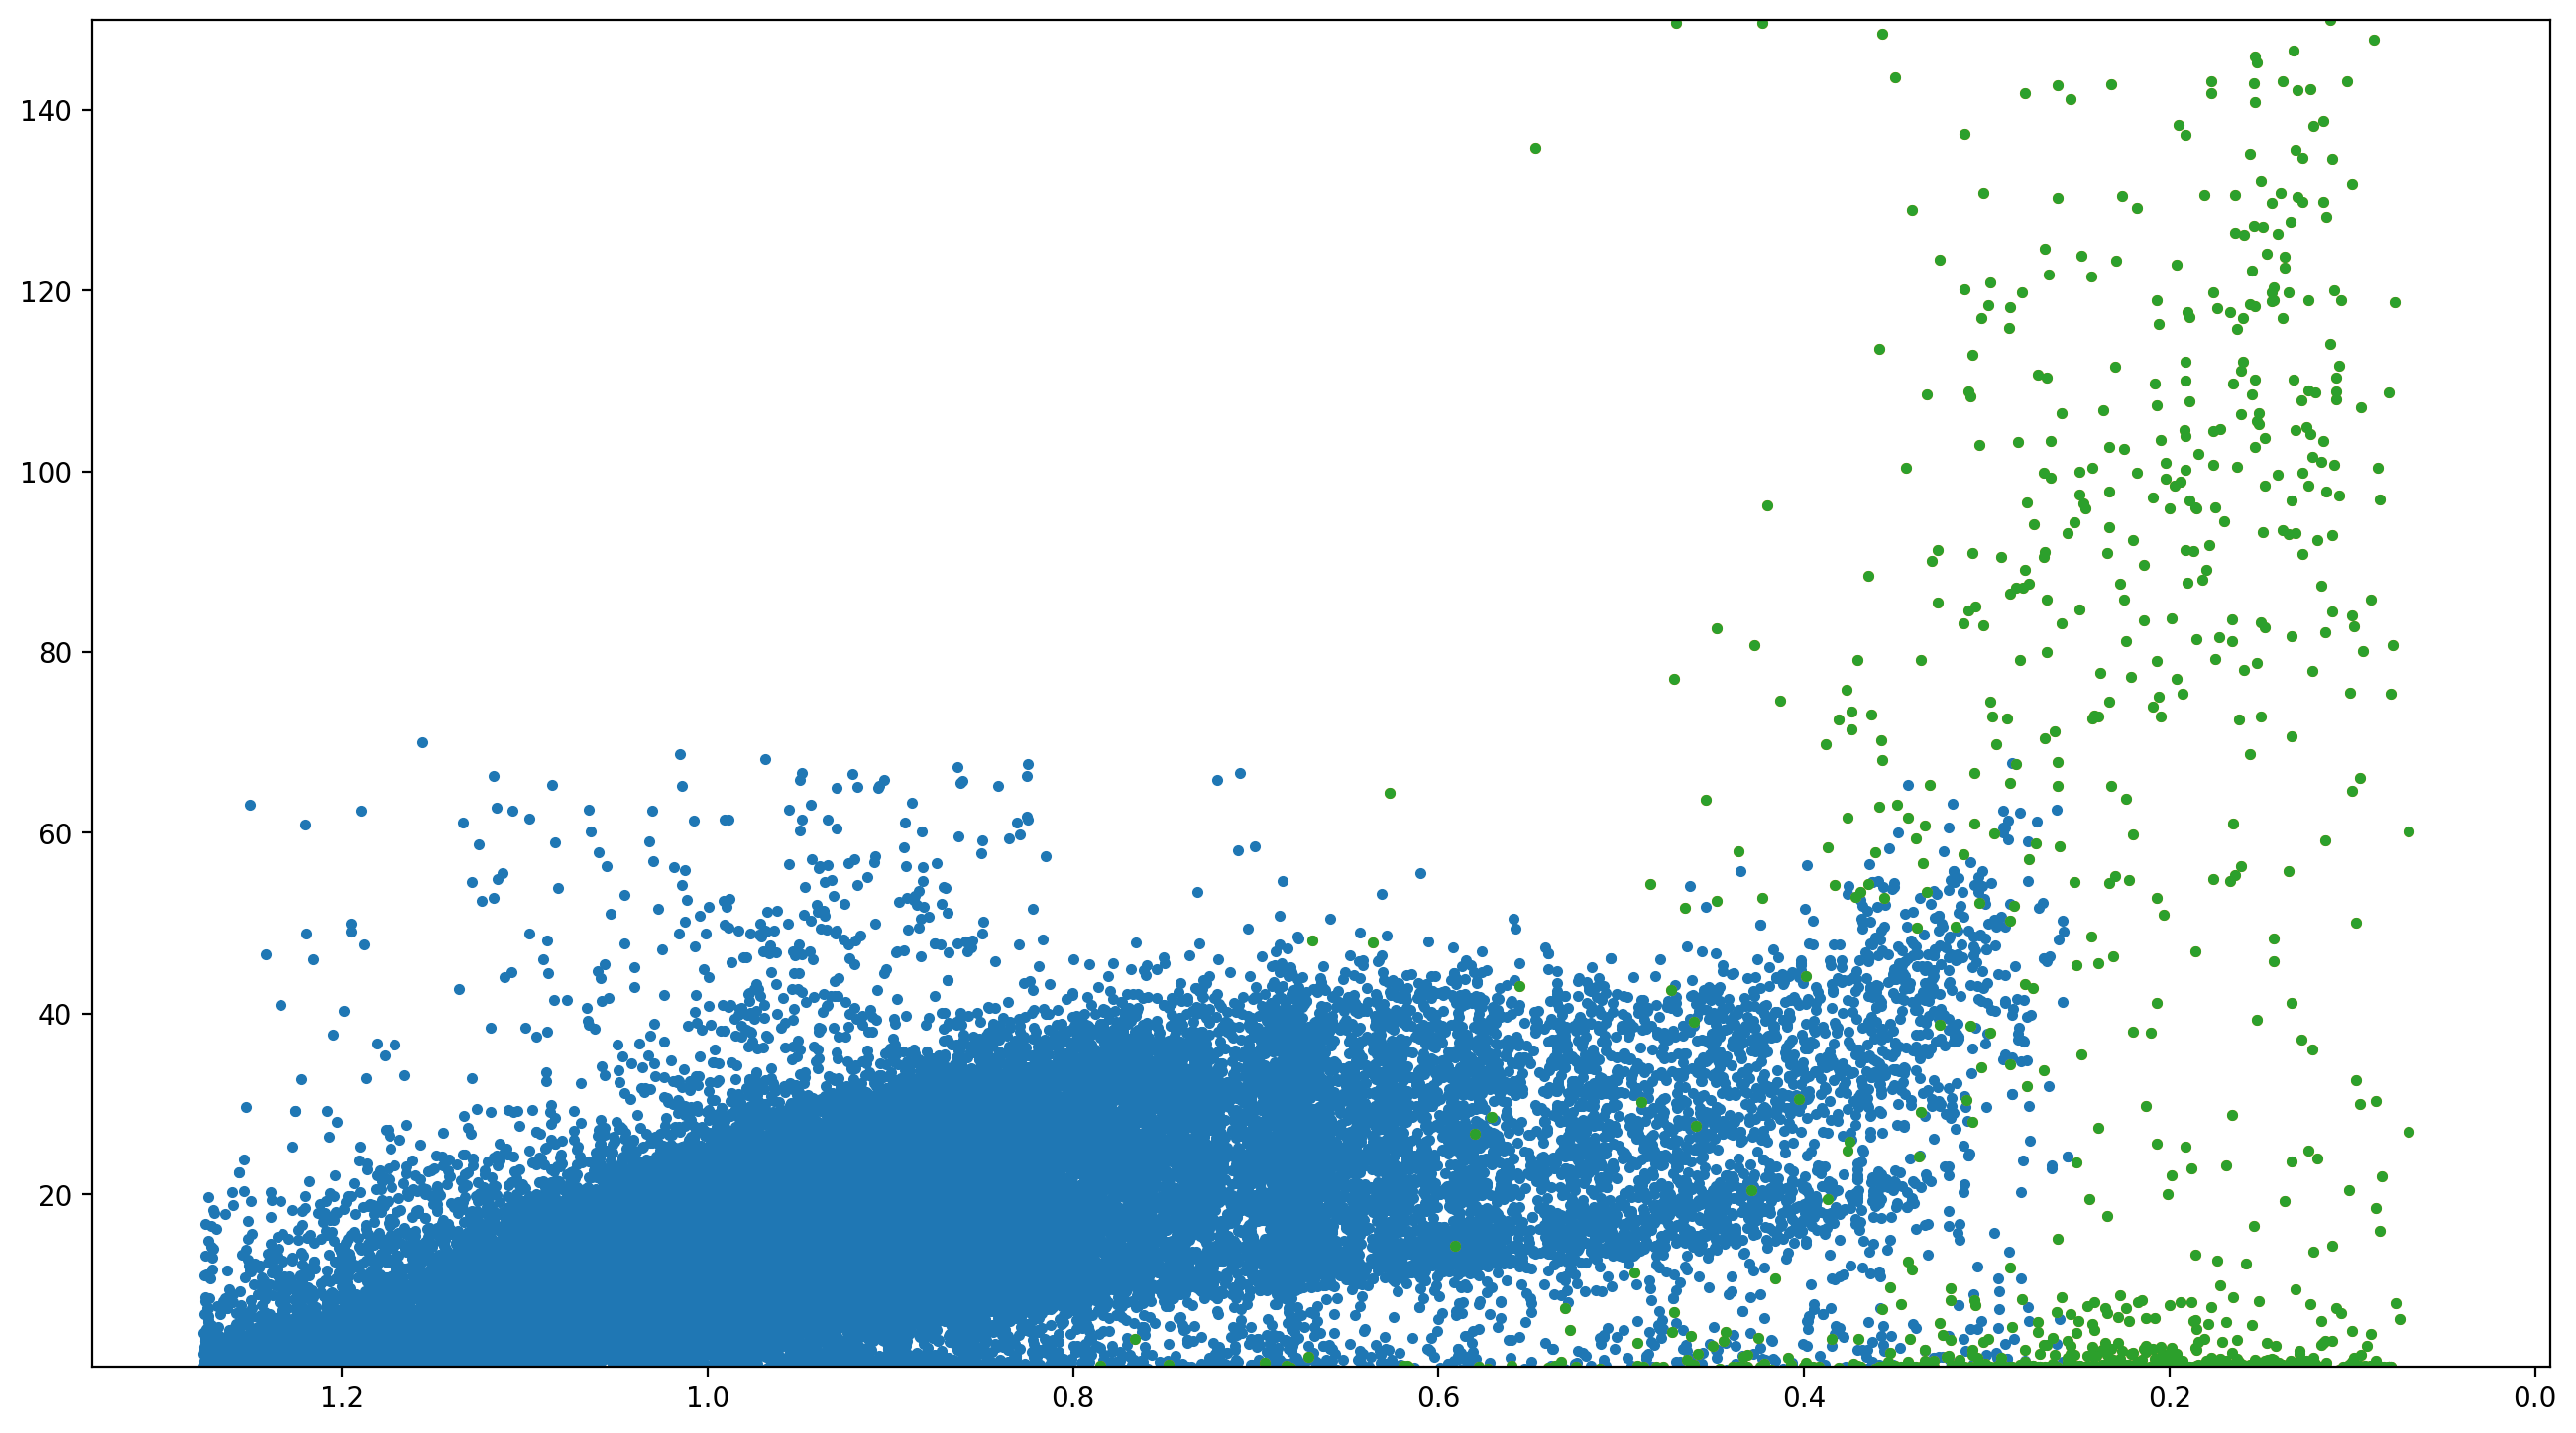

In [31]:
plt.figure(figsize=(16, 9), dpi=200)
plt.plot(kepler.Mass, kepler.Prot, ".")
plt.plot(mearth_north.Mass, mearth_north.Per, ".")
plt.plot(mearth_north.Mass, mearth_north.Per, ".")
plt.gca().invert_xaxis()
plt.ylim(1, 150)

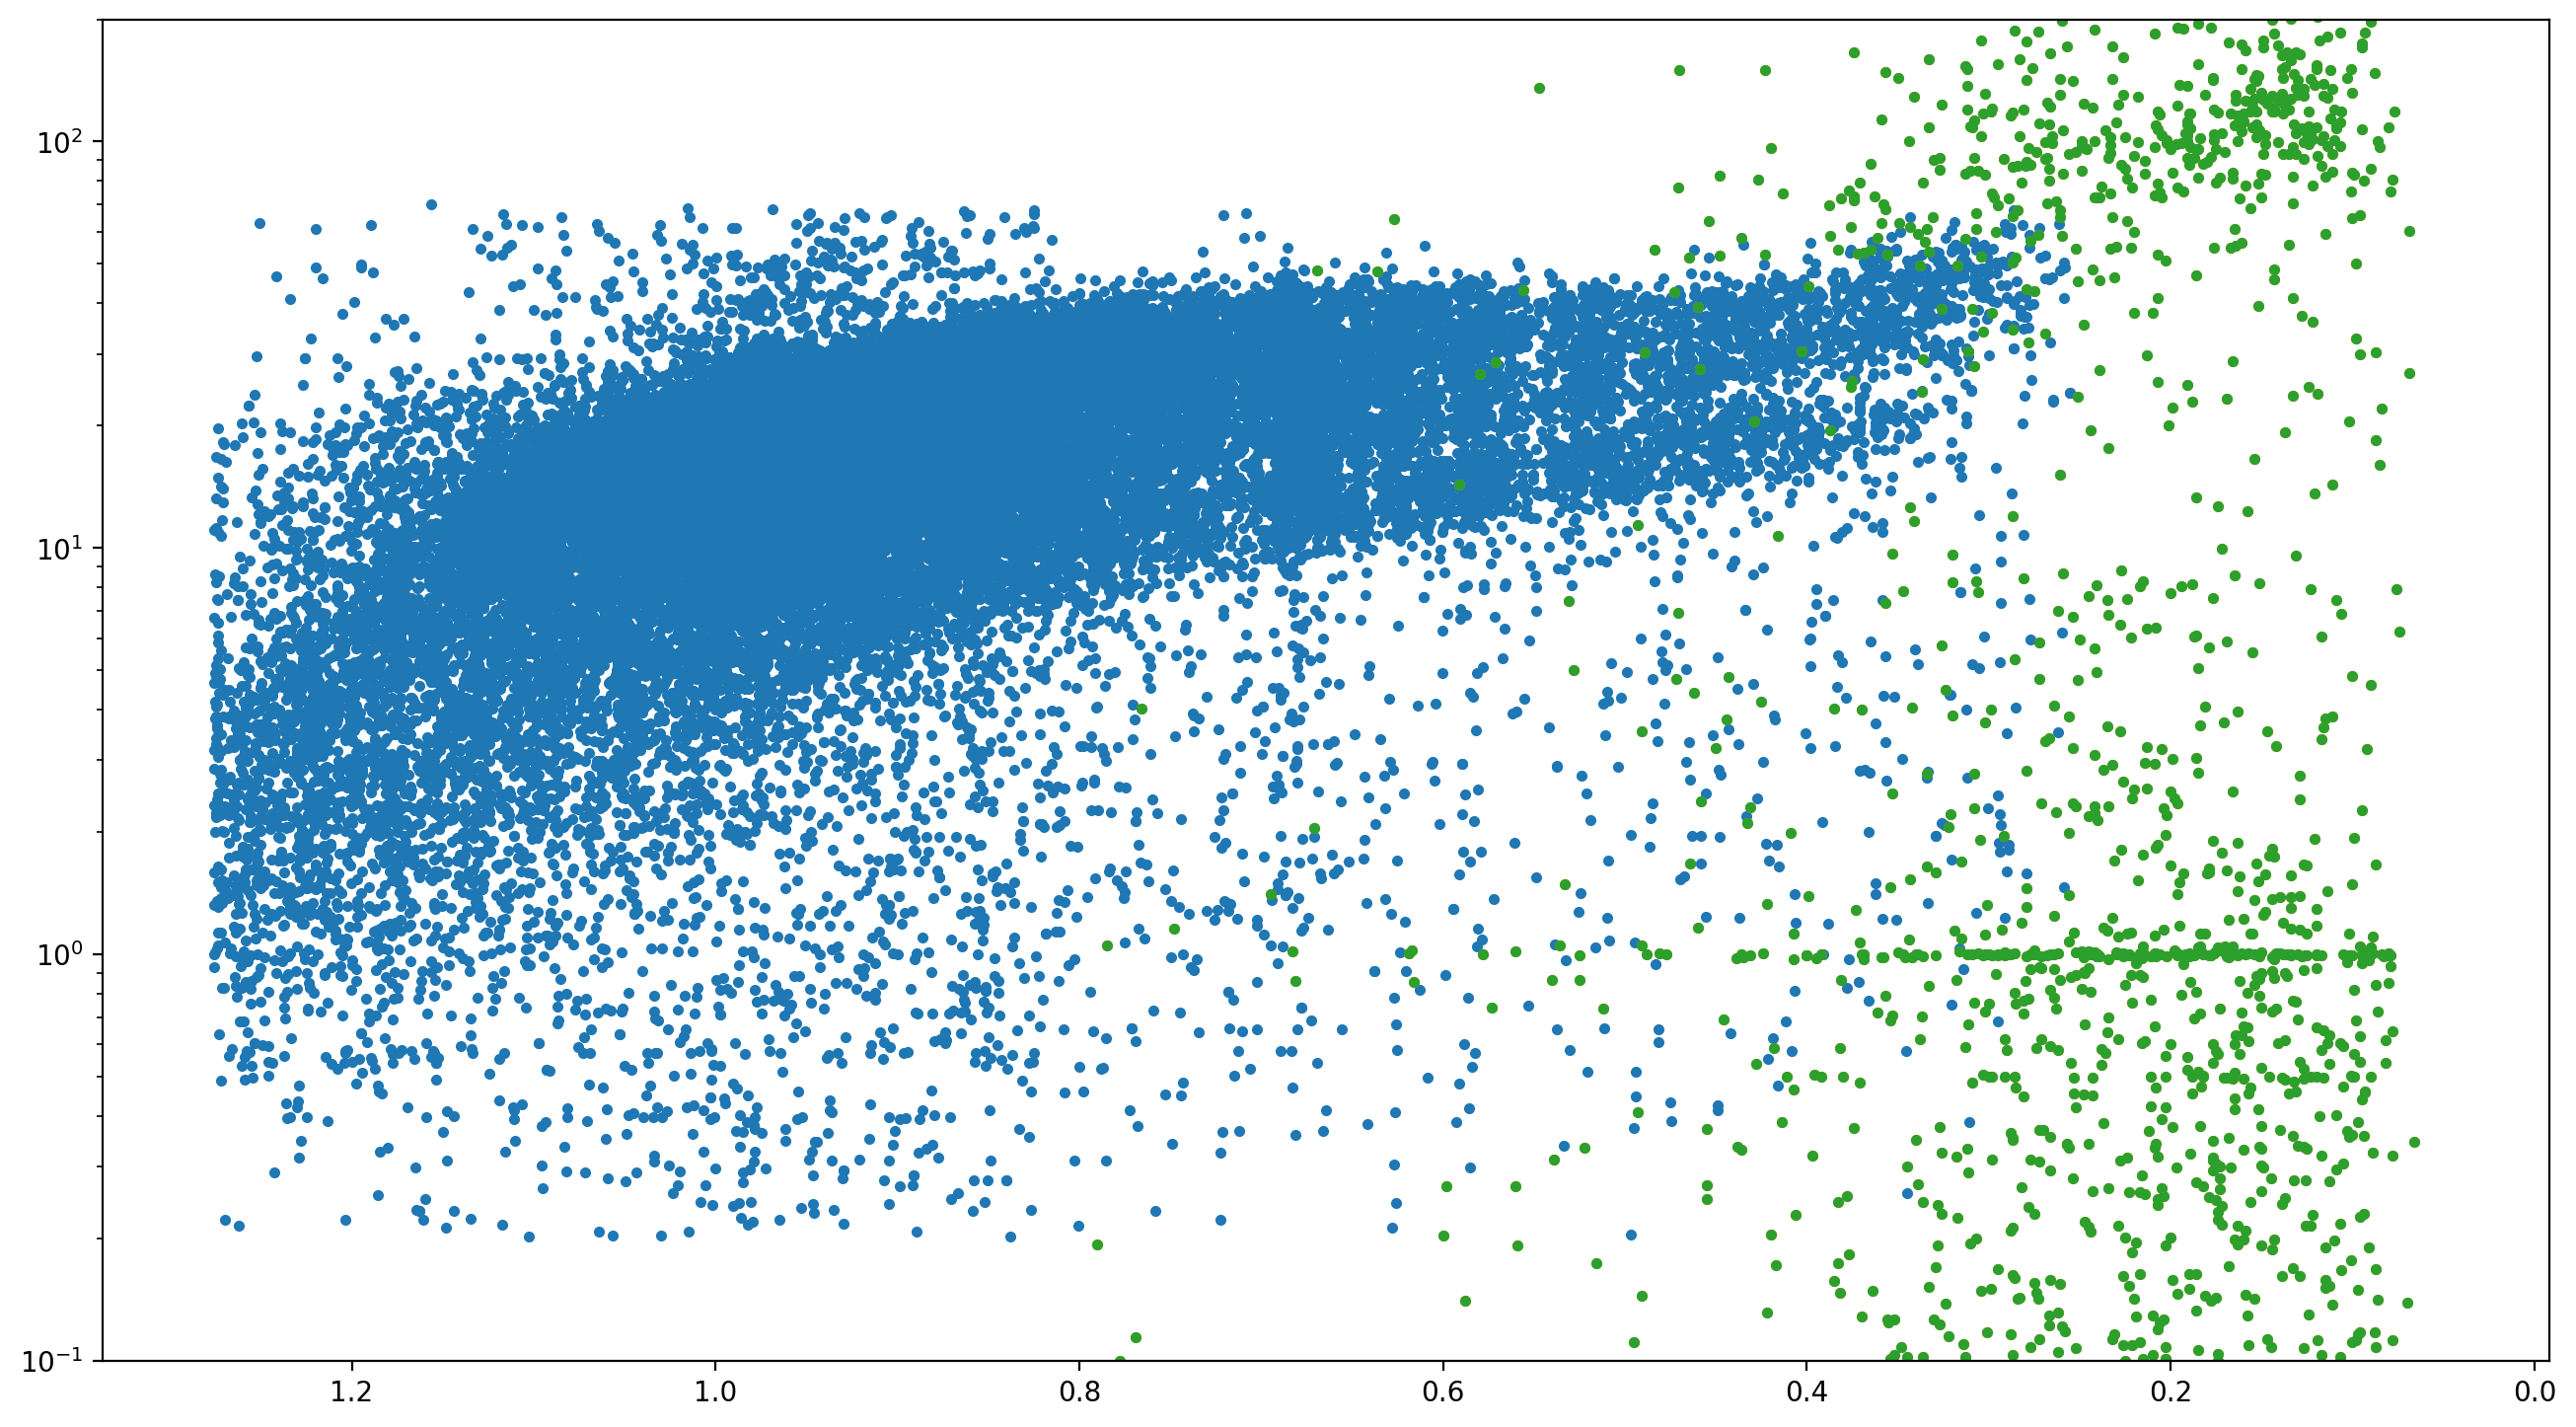

In [42]:
plt.figure(figsize=(16, 9), dpi=200)
plt.plot(kepler.Mass, kepler.Prot, ".")
plt.plot(mearth_north.Mass, mearth_north.Per, ".")
plt.plot(mearth_north.Mass, mearth_north.Per, ".")
plt.gca().invert_xaxis()
plt.ylim(.1, 200)
plt.yscale("log")

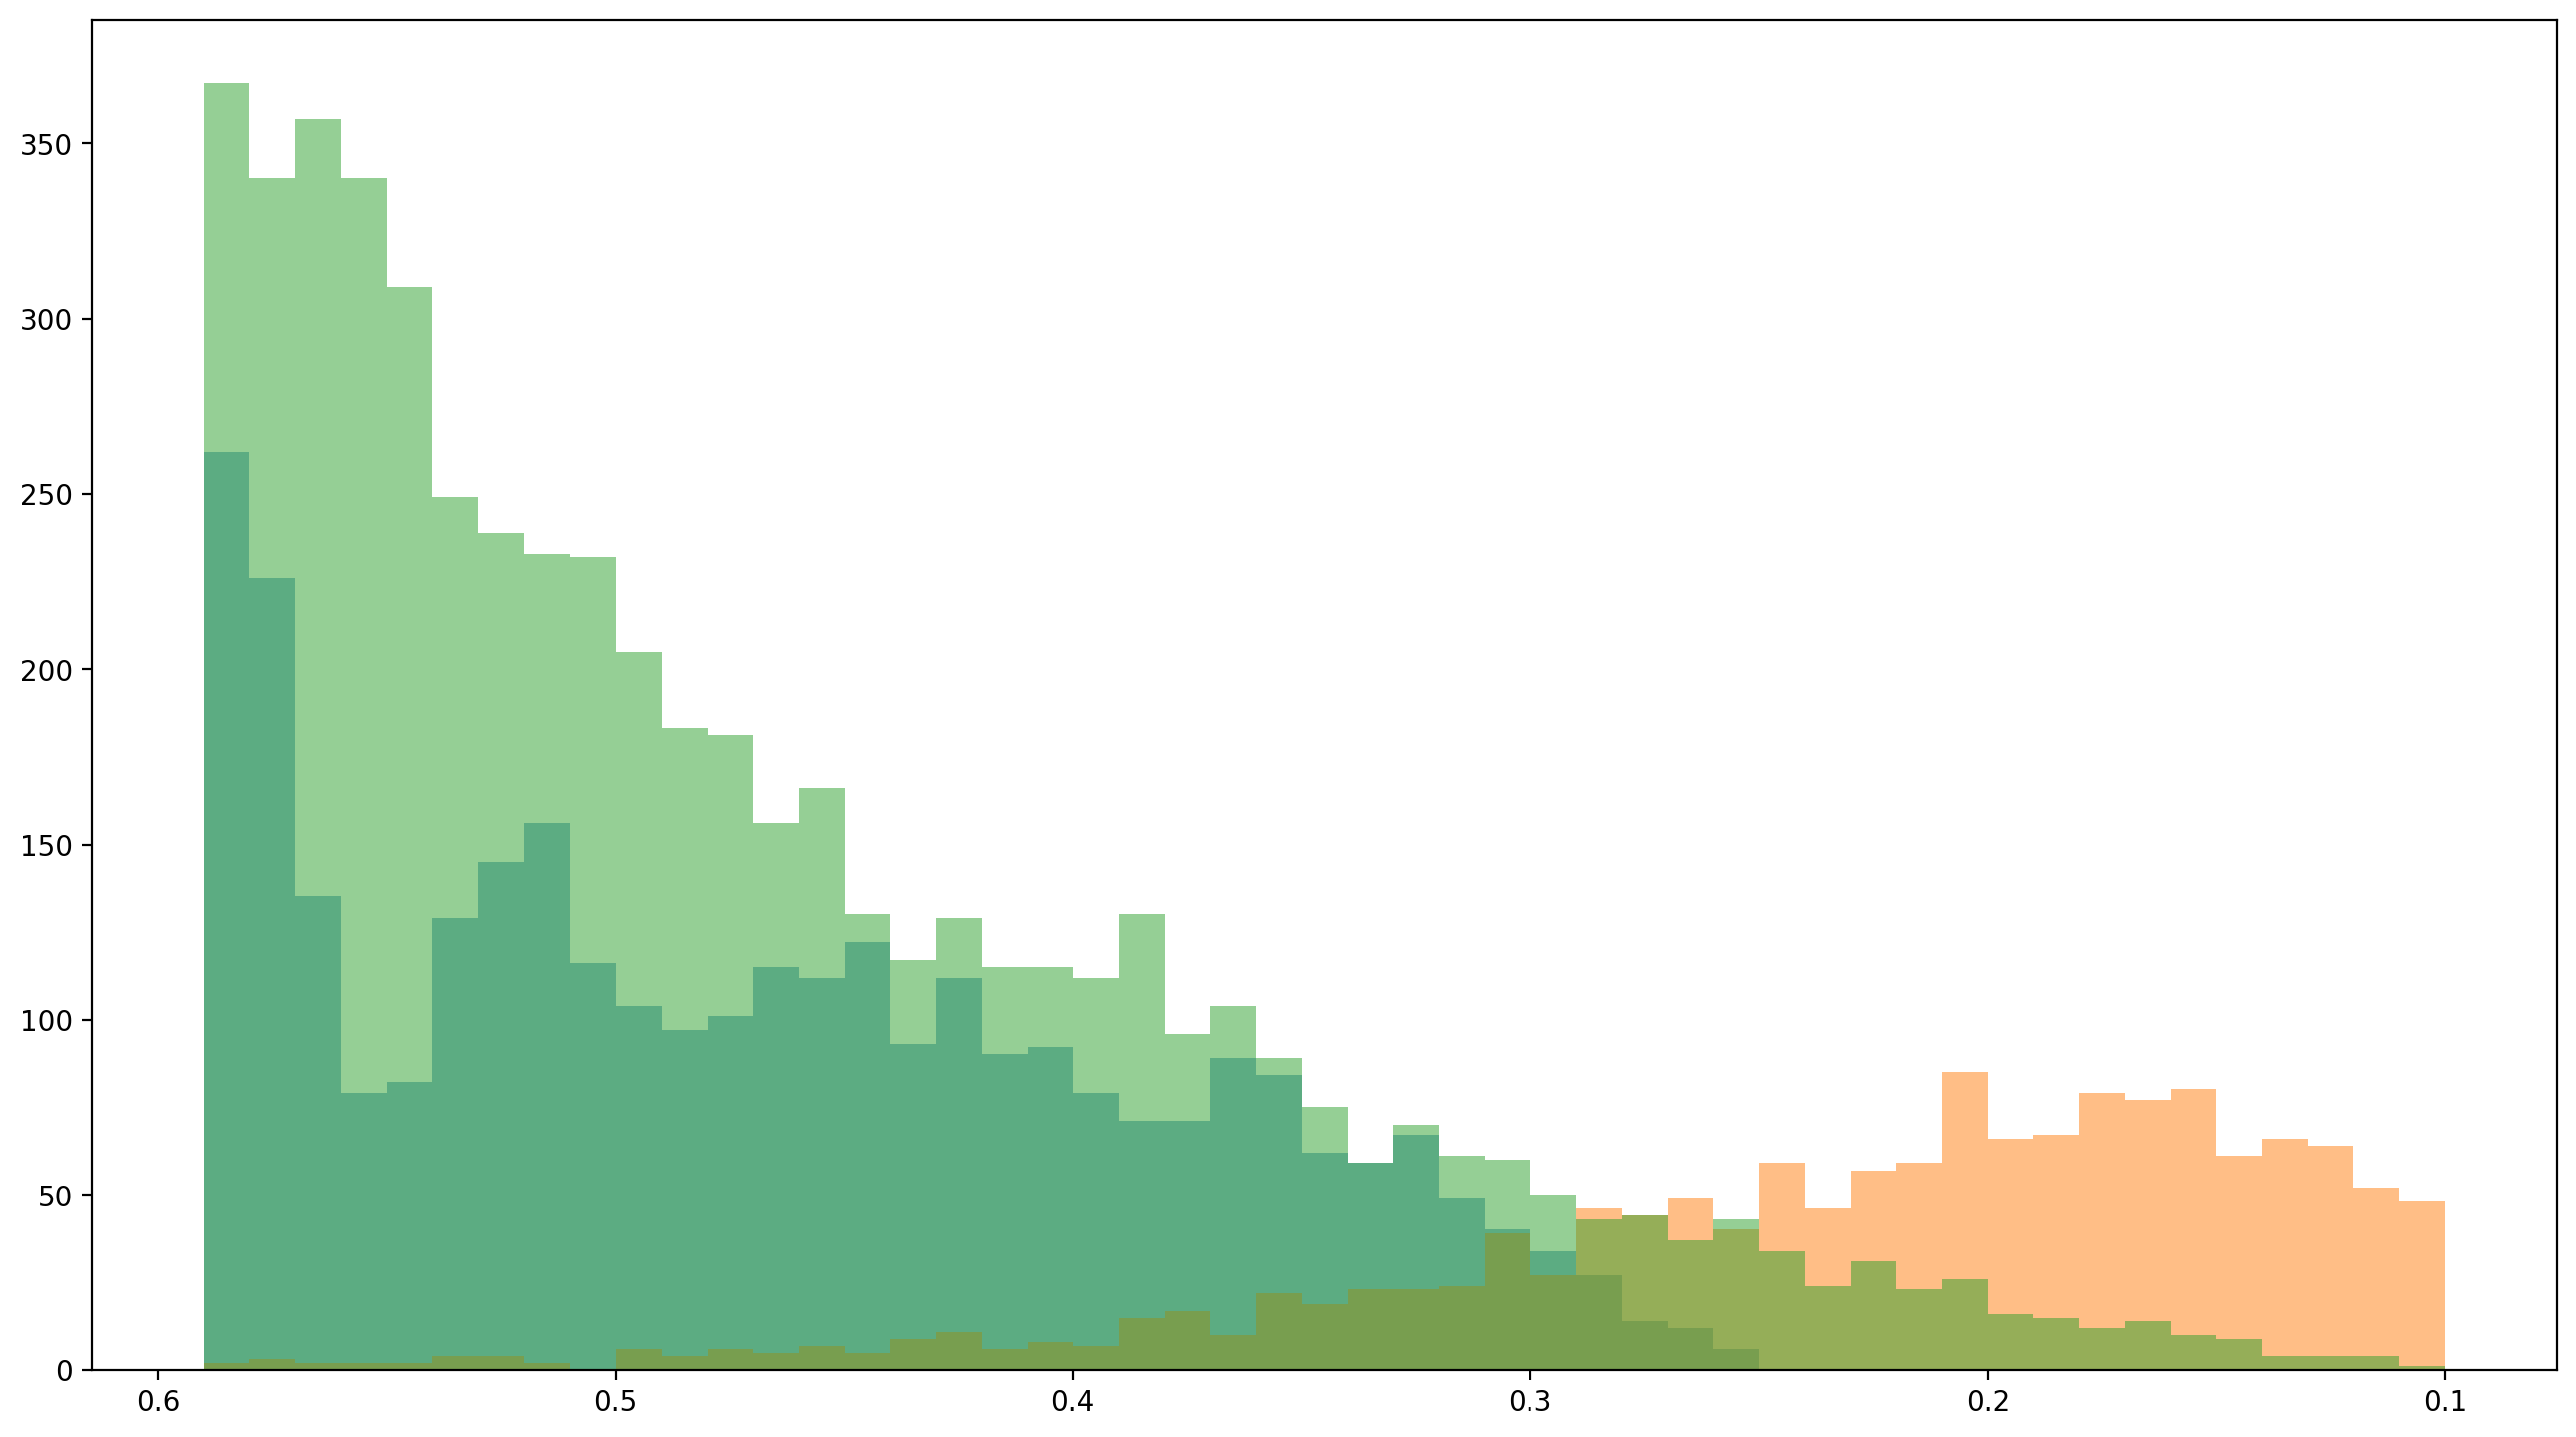

In [56]:
plt.figure(figsize=(16, 9), dpi=200)
bins = np.arange(.1, .6, .01)
plt.hist(kepler.Mass[kepler.Mass.values < .6], bins=bins, density=False, alpha=.5);
mmass = np.concatenate((mearth_north.Mass.values, mearth_south.Mass.values))
tmass = np.concatenate((tess_north.mass.values, tess_south.mass.values))
tmag = np.concatenate((tess_north.Tmag.values, tess_south.Tmag.values))
mprot = np.concatenate((mearth_north.Per.values, mearth_south.Per.values))
mm = mprot < 150
plt.hist(mmass[mm][mmass[mm] < .6], bins=bins, density=False, alpha=.5);
plt.hist(tmass[(tmass < .6) & (tmag < 14)], bins=bins, alpha=.5)
plt.gca().invert_xaxis()